### 기술통계 - 표본의 통계량 구하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab.files import upload
%matplotlib inline

#### 1. 데이터셋을 읽어 온다.

In [2]:
# df = pd.read_csv('./data/data_studentlist_en.csv', header='infer')  # 로컬파일 읽어오기.

In [3]:
dict_data = upload()                                                  # Colab으로 파일 올리기.
df = pd.read_csv(io.BytesIO(dict_data['data_studentlist_en.csv']))    # Colab으로 올린 파일 읽어오기.

Saving data_studentlist_en.csv to data_studentlist_en.csv


In [4]:
df.shape

(17, 8)

#### 2. 다양한 통계량을 계산해 본다.

In [5]:
df.head(5)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [6]:
df.loc[:,'height'].mean()

170.03529411764703

In [7]:
df['height'].mean()

170.03529411764703

In [8]:
df['height'].median()

169.2

In [9]:
df['height'].min()

155.2

In [10]:
df['height'].max()

182.1

In [11]:
df['height'].quantile(0.1)         # 표본의 분위수!

160.48

In [12]:
df['height'].quantile(0.5)         # 표본의 분위수!

169.2

In [13]:
IQR = df['height'].quantile(0.75) - df['height'].quantile(0.25)
IQR

10.799999999999983

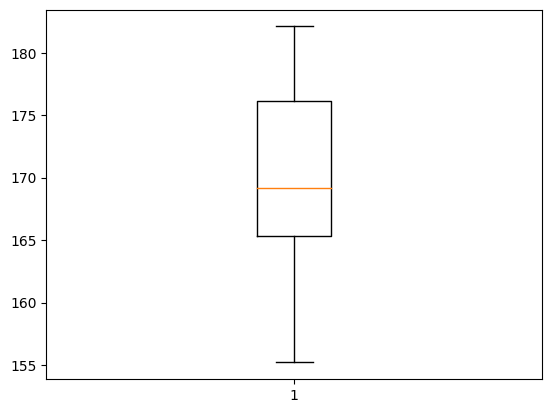

In [14]:
plt.boxplot(df['height'])
plt.show()

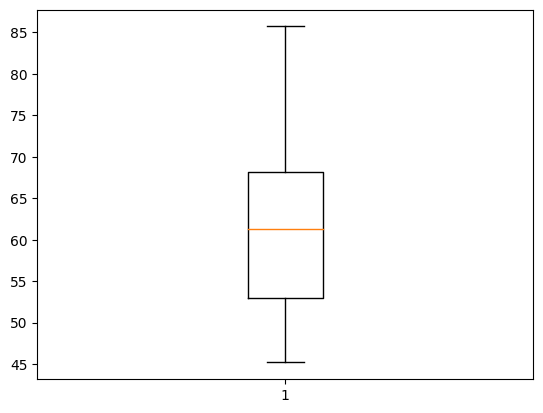

In [15]:
plt.boxplot(df['weight'])
plt.show()

In [16]:
df['height'].var(ddof=1)

61.61867647058827

In [17]:
n = 17
(((df['height'])**2).mean() - (df['height'].mean())**2)*n/(n-1)

61.618676470603305

In [18]:
df['height'].std(ddof=1)

7.849756459316955

In [19]:
df['height'].cov(df['weight'],ddof=1)

61.790698529411785

In [20]:
df['height'].corr(df['weight'])

0.6641815979588611

In [21]:
df['height'].cov(df['weight'],ddof=1)/(df['height'].std(ddof=1)*df['weight'].std(ddof=1))

0.6641815979588612

#### 3. 산점도로 데이터를 시각화 해본다.

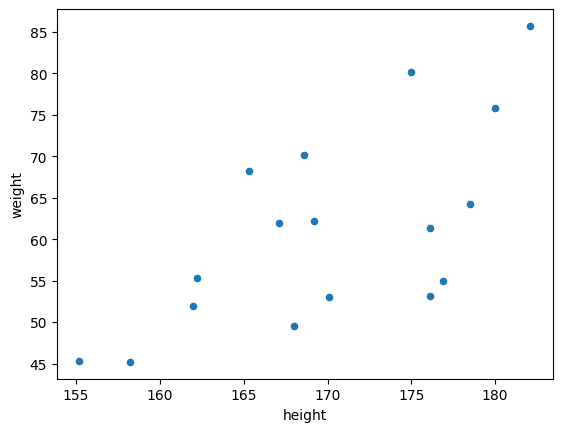

In [22]:
# 전체 같은 색으로.
df.plot.scatter(x='height',y='weight')
plt.show()

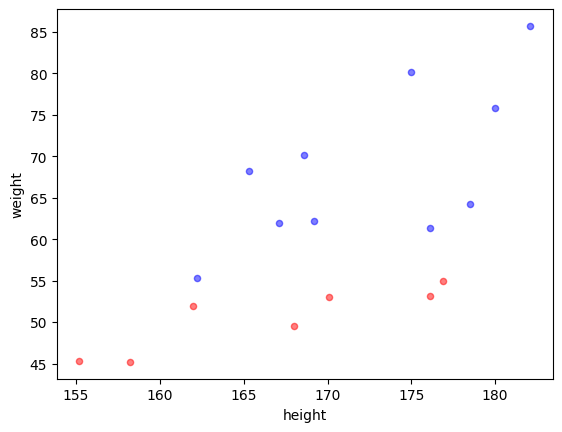

In [23]:
# 성별로 색상 구분. 방법 #1.
base = df[df.gender=='M'].plot.scatter(x='height', y='weight',color='blue', alpha=0.5, marker='o',s=20)
df[df.gender=='F'].plot.scatter(x='height', y='weight',color='red', alpha = 0.5, marker='o',s=20, ax=base)
plt.show()

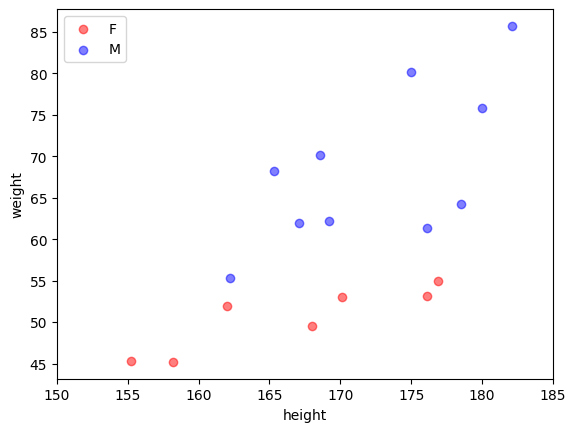

In [24]:
# 성별로 색상 구분. 방법 #2.
my_groups = df.groupby('gender')
my_colors = ['red', 'blue', 'orange', 'green']
i=0
for name, dfb in my_groups:
    plt.scatter(dfb.height, dfb.weight, color = my_colors[i], alpha = 0.5, label=name)
    i +=1
plt.legend(loc=2)
plt.xlim([150,185])
plt.xlabel("height")
plt.ylabel("weight")
plt.show()